In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Datasets/merged(flats_&_houses)_CLEANED.csv')

In [4]:
df.duplicated().sum()

122

In [6]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,orchid petals,sector 49,4.52,10984.0,4115.0,Super Built up area 4115(382.3 sq.m.),5,5,3+,"pooja room,study room,servant room",14.0,West,5 to 10 Year Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBazaar', 'Sohna Rd', 'Kinder Care Playschool', 'Kangaroo Kids Preschool', 'shiv Mandir', 'Polaris Hospital', 'Medanta Hospital', 'Artemis Hospital', 'HDFC Bank', 'Radisson Hotel', 'SRS Cinemas']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


## 1. areaWithType

In [7]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
1744,2.80,1828.0,Built Up area: 1828 (169.83 sq.m.)
2687,1.55,1150.0,Super Built up area 1150(106.84 sq.m.)
2320,2.80,1650.0,Super Built up area 1975(183.48 sq.m.)Built Up area: 1800 sq.ft. (167.23 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.)
582,1.68,2003.0,Super Built up area 2003(186.08 sq.m.)Built Up area: 1338.29 sq.ft. (124.33 sq.m.)Carpet area: 986.41 sq.ft. (91.64 sq.m.)
3,0.38,65517.0,Carpet area: 64529 (5994.94 sq.m.)


In [8]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [10]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [11]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [12]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2737,1.75,flat,1852.0,Super Built up area 1852(172.06 sq.m.)Carpet area: 1128 sq.ft. (104.79 sq.m.),1852.0,NaN,1128.0
3075,1.20,flat,1930.0,Super Built up area 1930(179.3 sq.m.),1930.0,NaN,NaN
2741,1.90,flat,1929.0,Carpet area: 1929 (179.21 sq.m.),NaN,NaN,1929.0
3256,0.90,flat,1950.0,Super Built up area 1950(181.16 sq.m.),1950.0,NaN,NaN
1944,12.00,house,3240.0,Carpet area: 360 (301.01 sq.m.),NaN,NaN,360.0


In [13]:
df.duplicated().sum()

122

In [14]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [15]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,5.25,house,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 160 sq.yards (133.78 sq.m.)Carpet area: 150 sq.yards (125.42 sq.m.),NaN,160.0,150.0
11,4.60,house,2610.0,Plot area 290(242.48 sq.m.),NaN,NaN,NaN
17,5.25,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
18,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,NaN,NaN
21,1.00,house,135.0,Plot area 135(12.54 sq.m.)Built Up area: 3750 sq.ft. (348.39 sq.m.),NaN,3750.0,NaN


In [16]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [17]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [18]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
11,4.60,house,2610.0,Plot area 290(242.48 sq.m.),NaN,NaN,NaN
17,5.25,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
18,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,NaN,NaN
27,4.00,house,2400.0,Plot area 2400(222.97 sq.m.),NaN,NaN,NaN
32,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,NaN,NaN


In [19]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [20]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [21]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [22]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
11,4.60,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
17,5.25,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
18,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,1440.00,NaN
27,4.00,house,2400.0,Plot area 2400(222.97 sq.m.),NaN,2400.00,NaN
32,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,260.00,NaN
35,2.98,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.00,NaN
36,12.25,house,5850.0,Plot area 5850(543.48 sq.m.),NaN,5850.00,NaN
41,0.75,house,640.0,Plot area 640(59.46 sq.m.),NaN,640.00,NaN
51,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,3400.00,NaN
54,4.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,240.00,NaN


In [23]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [24]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [25]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
11,4.60,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.00,NaN
17,5.25,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
18,3.50,house,1440.0,Plot area 1440(133.78 sq.m.),NaN,1440.00,NaN
27,4.00,house,2400.0,Plot area 2400(222.97 sq.m.),NaN,2400.00,NaN
32,5.00,house,2340.0,Plot area 260(217.39 sq.m.),NaN,2340.00,NaN
35,2.98,house,1449.0,Plot area 161(134.62 sq.m.),NaN,1449.00,NaN
36,12.25,house,5850.0,Plot area 5850(543.48 sq.m.),NaN,5850.00,NaN
41,0.75,house,640.0,Plot area 640(59.46 sq.m.),NaN,640.00,NaN
51,2.50,house,3542.0,Plot area 3400(315.87 sq.m.),NaN,3400.00,NaN
54,4.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.00,NaN


In [26]:
# update the original dataframe
df.update(all_nan_df)

In [27]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [28]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,orchid petals,sector 49,4.52,10984.0,4115.0,Super Built up area 4115(382.3 sq.m.),5,5,3+,"pooja room,study room,servant room",14.0,West,5 to 10 Year Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBazaar', 'Sohna Rd', 'Kinder Care Playschool', 'Kangaroo Kids Preschool', 'shiv Mandir', 'Polaris Hospital', 'Medanta Hospital', 'Artemis Hospital', 'HDFC Bank', 'Radisson Hotel', 'SRS Cinemas']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",4115.0,NaN,NaN
1,flat,sobha city,sector 108,2.60,15195.0,1711.0,Super Built up area 1711(158.96 sq.m.),3,3,2,not available,8.0,East,1 to 5 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']",[],"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1711.0,NaN,NaN
2,flat,paras dews,sector 106,1.00,7220.0,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up area: 940 sq.ft. (87.33 sq.m.)Carpet area: 845 sq.ft. (78.5 sq.m.),2,2,3+,not available,2.0,North-East,0 to 1 Year Old,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']","['2 Geyser', '1 Stove', '12 Light', '1 Modular Kitchen', '3 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']",1385.0,940.0,845.0
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,study room,10.0,East,0 to 1 Year Old,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk', 'NH8', 'KMP Expressway', 'IMT Manesar', 'ISBT', 'Hero Honda Chowk', 'IGI Airport', 'Railway Station', 'Proposed Diplomatic enclave', 'Flava', 'Spicy Salsa', ""Nihar's Cafe"", 'Cheeni singh restaurant']",NaN,"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,64529.0
4,flat,signature global park,sohna road,0.70,6071.0,1153.0,Carpet area: 1153 (107.12 sq.m.),3,3,3,pooja room,2.0,North,1 to 5 Year Old,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']","['3 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Was

## 2.additionalRoom

In [29]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [30]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [31]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1059,servant room,0,1,0,0,0
2962,servant room,0,1,0,0,0
1231,not available,0,0,0,0,0
2027,servant room,0,1,0,0,0
1849,"pooja room,others",0,0,0,1,1


In [32]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,orchid petals,sector 49,4.52,10984.0,4115.0,Super Built up area 4115(382.3 sq.m.),5,5,3+,"pooja room,study room,servant room",14.0,West,5 to 10 Year Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBazaar', 'Sohna Rd', 'Kinder Care Playschool', 'Kangaroo Kids Preschool', 'shiv Mandir', 'Polaris Hospital', 'Medanta Hospital', 'Artemis Hospital', 'HDFC Bank', 'Radisson Hotel', 'SRS Cinemas']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",4115.0,NaN,NaN,1,1,0,1,0
1,flat,sobha city,sector 108,2.60,15195.0,1711.0,Super Built up area 1711(158.96 sq.m.),3,3,2,not available,8.0,East,1 to 5 Year Old,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']",[],"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1711.0,NaN,NaN,0,0,0,0,0
2,flat,paras dews,sector 106,1.00,7220.0,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up area: 940 sq.ft. (87.33 sq.m.)Carpet area: 845 sq.ft. (78.5 sq.m.),2,2,3+,not available,2.0,North-East,0 to 1 Year Old,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']","['2 Geyser', '1 Stove', '12 Light', '1 Modular Kitchen', '3 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']",1385.0,940.0,845.0,0,0,0,0,0
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,study room,10.0,East,0 to 1 Year Old,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk', 'NH8', 'KMP Expressway', 'IMT Manesar', 'ISBT', 'Hero Honda Chowk', 'IGI Airport', 'Railway Station', 'Proposed Diplomatic enclave', 'Flava', 'Spicy Salsa', ""Nihar's Cafe"", 'Cheeni singh restaurant']",NaN,"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,64529.0,1,0,0,0,0
4,flat,signature global park,sohna road,0.70,6071.0,1153.0,Carpet area: 1153 (107.12 sq.m.),3,3,3,pooja room,2.0,North,1 to 5 Year Old,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']","['3 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming P

## 3.agePossession

In [33]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Oct 2023                 4
Sep 2023                 4
Jul 2024                 4
By 2025                  4
Aug 2024                 4
Nov 2024                 3
Feb 2024                 3
May 2024                 3
Jan 2025                 3
Dec 2026                 2
Jan 2026                 2
Jul 2025                 2
Aug 2025                 2
Apr 2026                 2
Oct 2025                 2
Mar 2025                 2
Sep 2025                 2
Jun 2027      

In [34]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [35]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [36]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [37]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,orchid petals,sector 49,4.52,10984.0,4115.0,Super Built up area 4115(382.3 sq.m.),5,5,3+,"pooja room,study room,servant room",14.0,West,Moderately Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBazaar', 'Sohna Rd', 'Kinder Care Playschool', 'Kangaroo Kids Preschool', 'shiv Mandir', 'Polaris Hospital', 'Medanta Hospital', 'Artemis Hospital', 'HDFC Bank', 'Radisson Hotel', 'SRS Cinemas']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",4115.0,NaN,NaN,1,1,0,1,0
1,flat,sobha city,sector 108,2.60,15195.0,1711.0,Super Built up area 1711(158.96 sq.m.),3,3,2,not available,8.0,East,Relatively New,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']",[],"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1711.0,NaN,NaN,0,0,0,0,0
2,flat,paras dews,sector 106,1.00,7220.0,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up area: 940 sq.ft. (87.33 sq.m.)Carpet area: 845 sq.ft. (78.5 sq.m.),2,2,3+,not available,2.0,North-East,New Property,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']","['2 Geyser', '1 Stove', '12 Light', '1 Modular Kitchen', '3 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']",1385.0,940.0,845.0,0,0,0,0,0
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,study room,10.0,East,New Property,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk', 'NH8', 'KMP Expressway', 'IMT Manesar', 'ISBT', 'Hero Honda Chowk', 'IGI Airport', 'Railway Station', 'Proposed Diplomatic enclave', 'Flava', 'Spicy Salsa', ""Nihar's Cafe"", 'Cheeni singh restaurant']",NaN,"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,64529.0,1,0,0,0,0
4,flat,signature global park,sohna road,0.70,6071.0,1153.0,Carpet area: 1153 (107.12 sq.m.),3,3,3,pooja room,2.0,North,Relatively New,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi International Airport', 'Garhi harsaru railway station Gurgaon']","['3 Fan', '1 Exhaust Fan', '1 Dining Table', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Par

## 4.furnishDetails

In [38]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1502,"['4 Wardrobe', '4 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '2 AC', '1 Modular Kitchen', '1 Curtains', 'No Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
2637,"['6 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",['Water Storage']
2990,[],"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']"
2319,"['4 Fan', '1 Exhaust Fan', '2 Geyser', '11 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1225,"['5 Fan', '3 Geyser', '7 Light', '3 AC', '1 Chimney', '3 Wardrobe', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [39]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\laksh\AppData\Local\Temp\ipykernel_4076\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [40]:
furnishings_df.shape

(3803, 19)

In [41]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\laksh\AppData\Local\Temp\ipykernel_4076\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [42]:
furnishings_df.sample(5)

,Washing Machine,Bed,Geyser,Exhaust Fan,Stove,Light,Chimney,AC,Water Purifier,Curtains,Fridge,Wardrobe,Modular Kitchen,Fan,Sofa,Microwave,Dining Table,TV
2452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
221,0,0,3,1,0,8,1,0,0,0,0,3,1,6,0,0,0,0
2733,0,4,2,1,0,17,1,4,0,1,0,0,1,5,1,1,0,0
2387,0,0,6,1,1,30,1,5,1,0,0,0,0,12,0,0,0,0
2234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [47]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

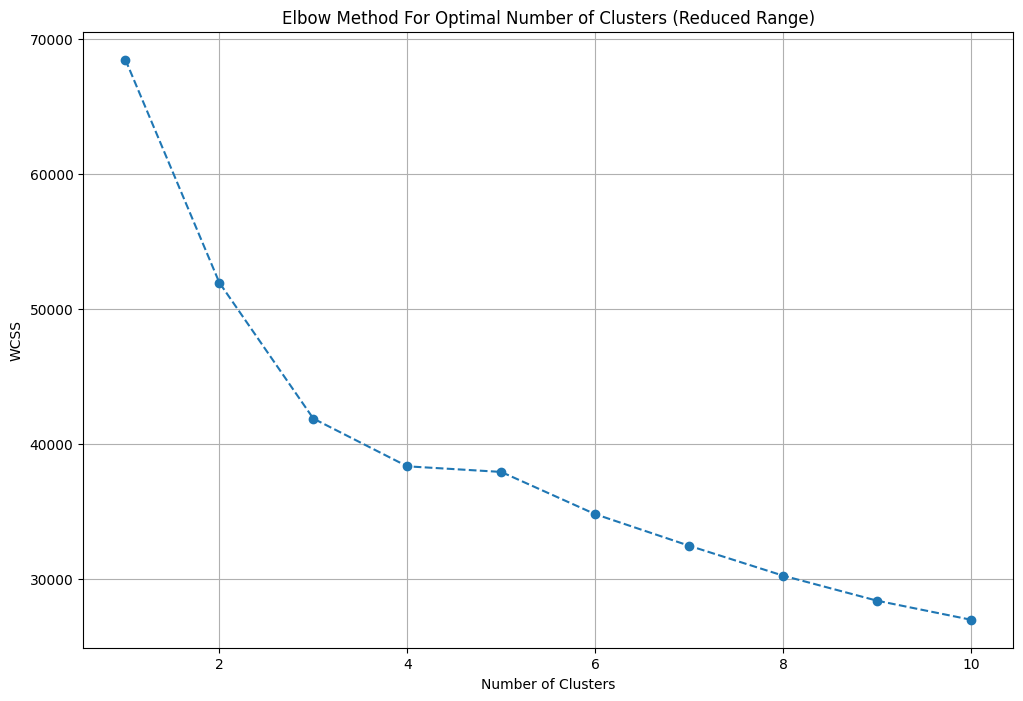

In [48]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [49]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [50]:
df = df.iloc[:,:-18]

In [51]:
df['furnishing_type'] = cluster_assignments

In [52]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2693,NaN,2
3636,[],2
669,"['4 Fan', '5 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
406,NaN,2
2924,"['1 Water Purifier', '25 Fan', '1 Fridge', '1 Exhaust Fan', '1 Dining Table', '16 Geyser', '1 Stove', '78 Light', '9 AC', '3 Chimney', '16 Curtains', '1 Modular Kitchen', '28 Wardrobe', 'No Bed', 'No Microwave', 'No Sofa', 'No TV', 'No Washing Machine']",0


## 5.features

In [53]:
df[['society','features']].sample(5)

,society,features
2838,tulip violet,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3070,m3m woodshire,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2391,smart world gems,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1560,tulip violet,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3170,umang winter hills,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [54]:
df['features'].isnull().sum()

635

In [56]:
import pandas as pd
app_df = pd.read_csv('Datasets/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [57]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [58]:
temp_df = df[df['features'].isnull()]

In [59]:
temp_df.shape

(635, 26)

In [60]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [61]:
df.loc[temp_df.index,'features'] = x.values

In [62]:
df['features'].isnull().sum()

481

In [63]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [64]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [65]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1386,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2622,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
437,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
features_binary_df.shape

(3803, 130)

In [67]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

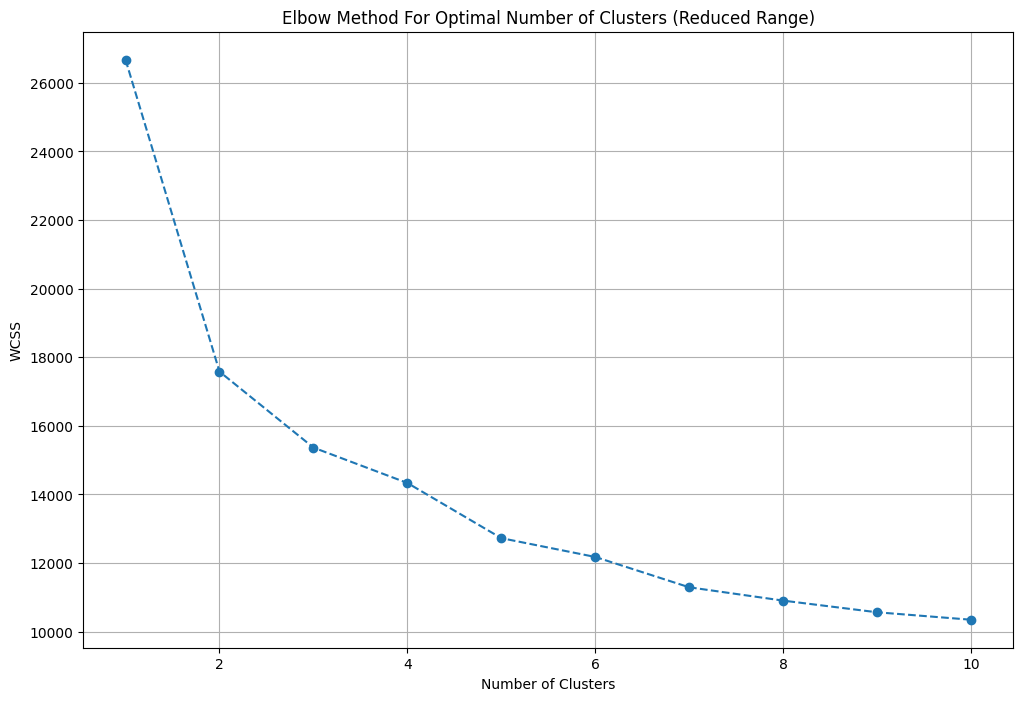

In [68]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [69]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [70]:
df['luxury_score'] = luxury_score

In [71]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,orchid petals,sector 49,4.52,10984.0,4115.0,Super Built up area 4115(382.3 sq.m.),5,5,3+,"pooja room,study room,servant room",14.0,West,Moderately Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBazaar', 'Sohna Rd', 'Kinder Care Playschool', 'Kangaroo Kids Preschool', 'shiv Mandir', 'Polaris Hospital', 'Medanta Hospital', 'Artemis Hospital', 'HDFC Bank', 'Radisson Hotel', 'SRS Cinemas']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",4115.0,NaN,NaN,1,1,0,1,0,2,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
1,flat,sobha city,sector 108,2.60,15195.0,1711.0,Super Built up area 1711(158.96 sq.m.),3,3,2,not available,8.0,East,Relatively New,"['Dwarka Sector 21', 'Dwarka Expressway', 'Vasant Kunj', 'The Shikshiyan School', 'The NorthCap University', 'Rions Hospital', 'IGI Airport', 'Gurgaon', 'WTC Plaza', 'Luxus Haritma Resort', 'Fun N Food WaterPark', 'BSF Golf Course', 'Nehru Stadium']",[],"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",1711.0,NaN,NaN,0,0,0,0,0,2,"[Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Visitor Parking, Swimming Pool, Park, Internet/wi-fi connectivity, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center, Water softening plant]",99
2,flat,paras dews,sector 106,1.00,7220.0,1385.0,Super Built up area 1385(128.67 sq.m.)Built Up area: 940 sq.ft. (87.33 sq.m.)Carpet area: 845 sq.ft. (78.5 sq.m.),2,2,3+,not available,2.0,North-East,New Property,"['MG Road Metro Station', 'NeoSquare Shopping Mall', 'Dwarka Expressway', 'Glorious World School', 'DPG Institute of Technology', 'Chirag Hospital', 'Indira Gandhi International Airport', 'Gurgaon', 'Country Inn & Suites by Radisson', 'SkyJumper Trampoline Park', 'Hamoni Golf Camp']","['2 Geyser', '1 Stove', '12 Light', '1 Modular Kitchen', '3 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park']",1385.0,940.0,845.0,0,0,0,0,0,1,"[Intercom Facility, Lift(s), Maintenance Staff, Park]",21
3,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,study room,10.0,East,New Property,"['Metro', 'Dwarka Expressway', 'Rajeev Chowk', 'NH8', 'KMP Expressway', 'IMT Manesar', 'ISBT', 'Hero Honda Chowk', 'IGI Airport', 'Railway Station', 'Proposed Diplomatic enclave', 'Flava', 'Spicy Salsa', ""Nihar's Cafe"", 'Cheeni singh restaurant']",NaN,"['Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,64529.0,1,0,0,0,0,2,"[Intercom Facility, Lift(s), Park]",15
4,flat,signature global park,sohna road,0.70,6071.0,1153.0,Carpet area: 1153 (107.12 sq.m.),3,3,3,pooja room,2.0,North,Relatively New,"['Sector 55-56 metro', 'Global city centre', 'Sohna road dhunela', 'Gd goenka university', 'Maharana pratap school', 'Vardaan hospital and trauma centre', 'Indira Gandhi 

In [72]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [73]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2237,flat,ats tourmaline,sector 109,1.50,6976.0,2150.0,Super Built up area 2150(199.74 sq.m.)Built Up area: 1797 sq.ft. (166.95 sq.m.)Carpet area: 1670 sq.ft. (155.15 sq.m.),3,4,3+,4.0,North-West,Relatively New,2150.0,1797.0,1670.0,0,1,0,0,0,2,39
310,flat,tulip white,sector 69,0.90,6000.0,1500.0,Super Built up area 1500(139.35 sq.m.)Built Up area: 1326 sq.ft. (123.19 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.),3,2,3+,1.0,West,Relatively New,1500.0,1326.0,1050.0,0,0,0,0,0,1,149
161,flat,dlf regency park,sector 28,2.25,14516.0,1550.0,Super Built up area 1777(165.09 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1550 sq.ft. (144 sq.m.),3,3,2,16.0,West,Old Property,1777.0,1700.0,1550.0,0,1,0,0,0,2,89
3261,flat,tulip violet,sector 69,1.68,8358.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,2.0,North-West,Relatively New,2010.0,NaN,NaN,0,0,0,1,0,2,112
1964,flat,pivotal devaan,sector 84,0.35,7276.0,481.0,Super Built up area 583(54.16 sq.m.)Carpet area: 481 sq.ft. (44.69 sq.m.),2,2,1,10.0,West,Relatively New,583.0,NaN,481.0,0,0,1,0,0,2,103


In [74]:
df.shape

(3803, 23)

In [75]:
df.to_csv('Datasets/merged(flats_&_houses)_CLEANED2.csv',index=False)